In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 250


In [20]:
experiments = ['esm2s_wavg_gat', 'esm2s_wavg_gcn', 'esm2s_wavg_mlp', 'esm2m_wavg_gat']
experiment_names = ['ESM2-small-GAT', 'ESM2-small-GCN', 'ESM2-small-MLP', 'ESM2-medium-GAT']

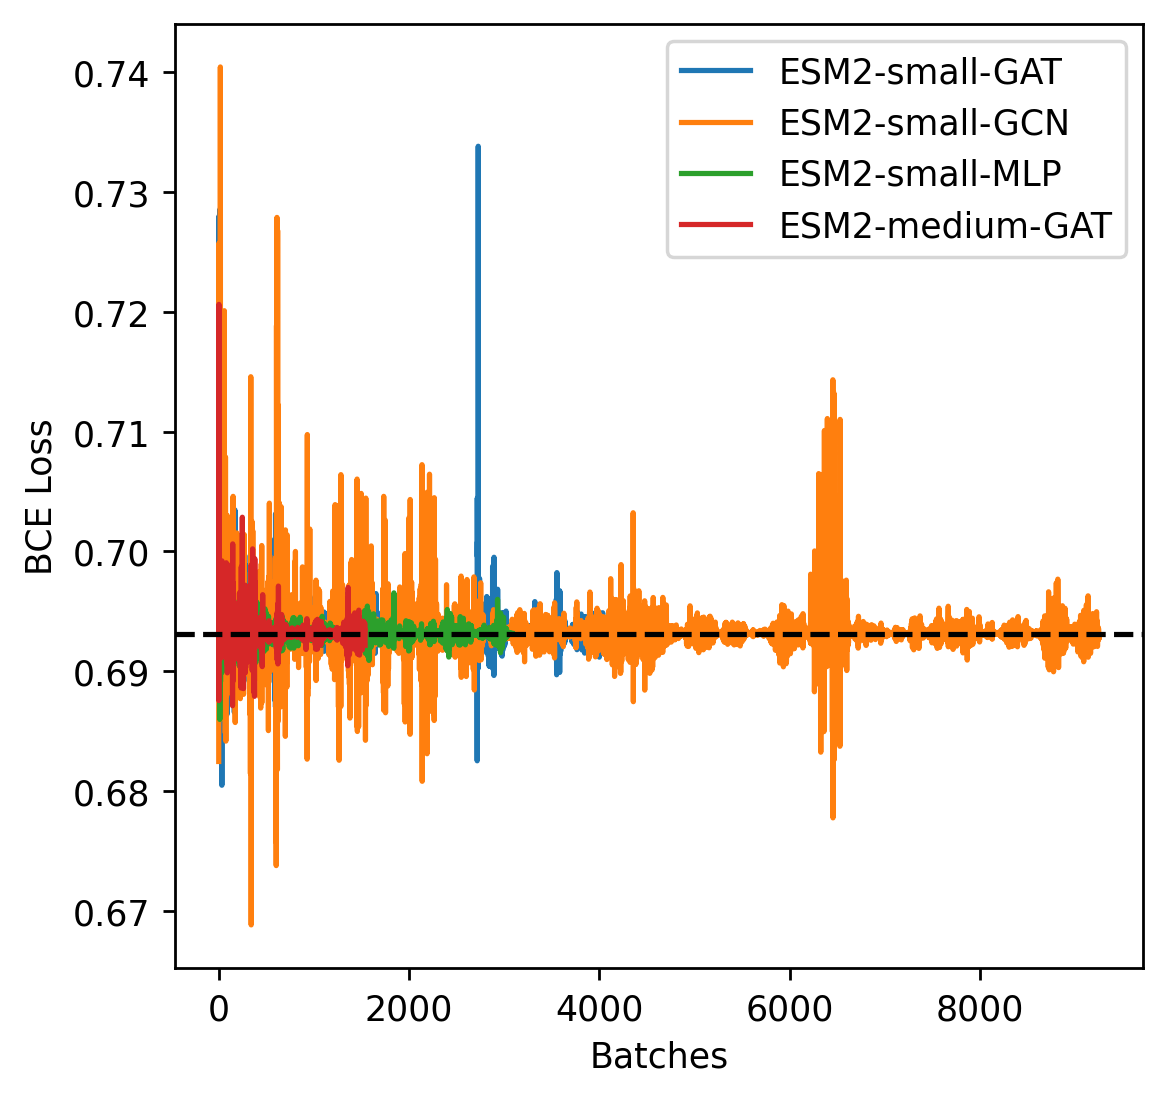

In [34]:
# loss plot

fig, ax = plt.subplots(1,1, figsize=(5,5))

for exp, name in zip(experiments, experiment_names):
    losses = np.load(exp + '_trainloss.npy')
    ax.plot(losses.flatten()[5:], label=name)
ax.axhline(y=-np.log(0.5), c='k', ls='dashed')
ax.legend()
ax.set_xlabel('Batches')
ax.set_ylabel('BCE Loss')

fig.savefig('../figures/training_losses.svg')

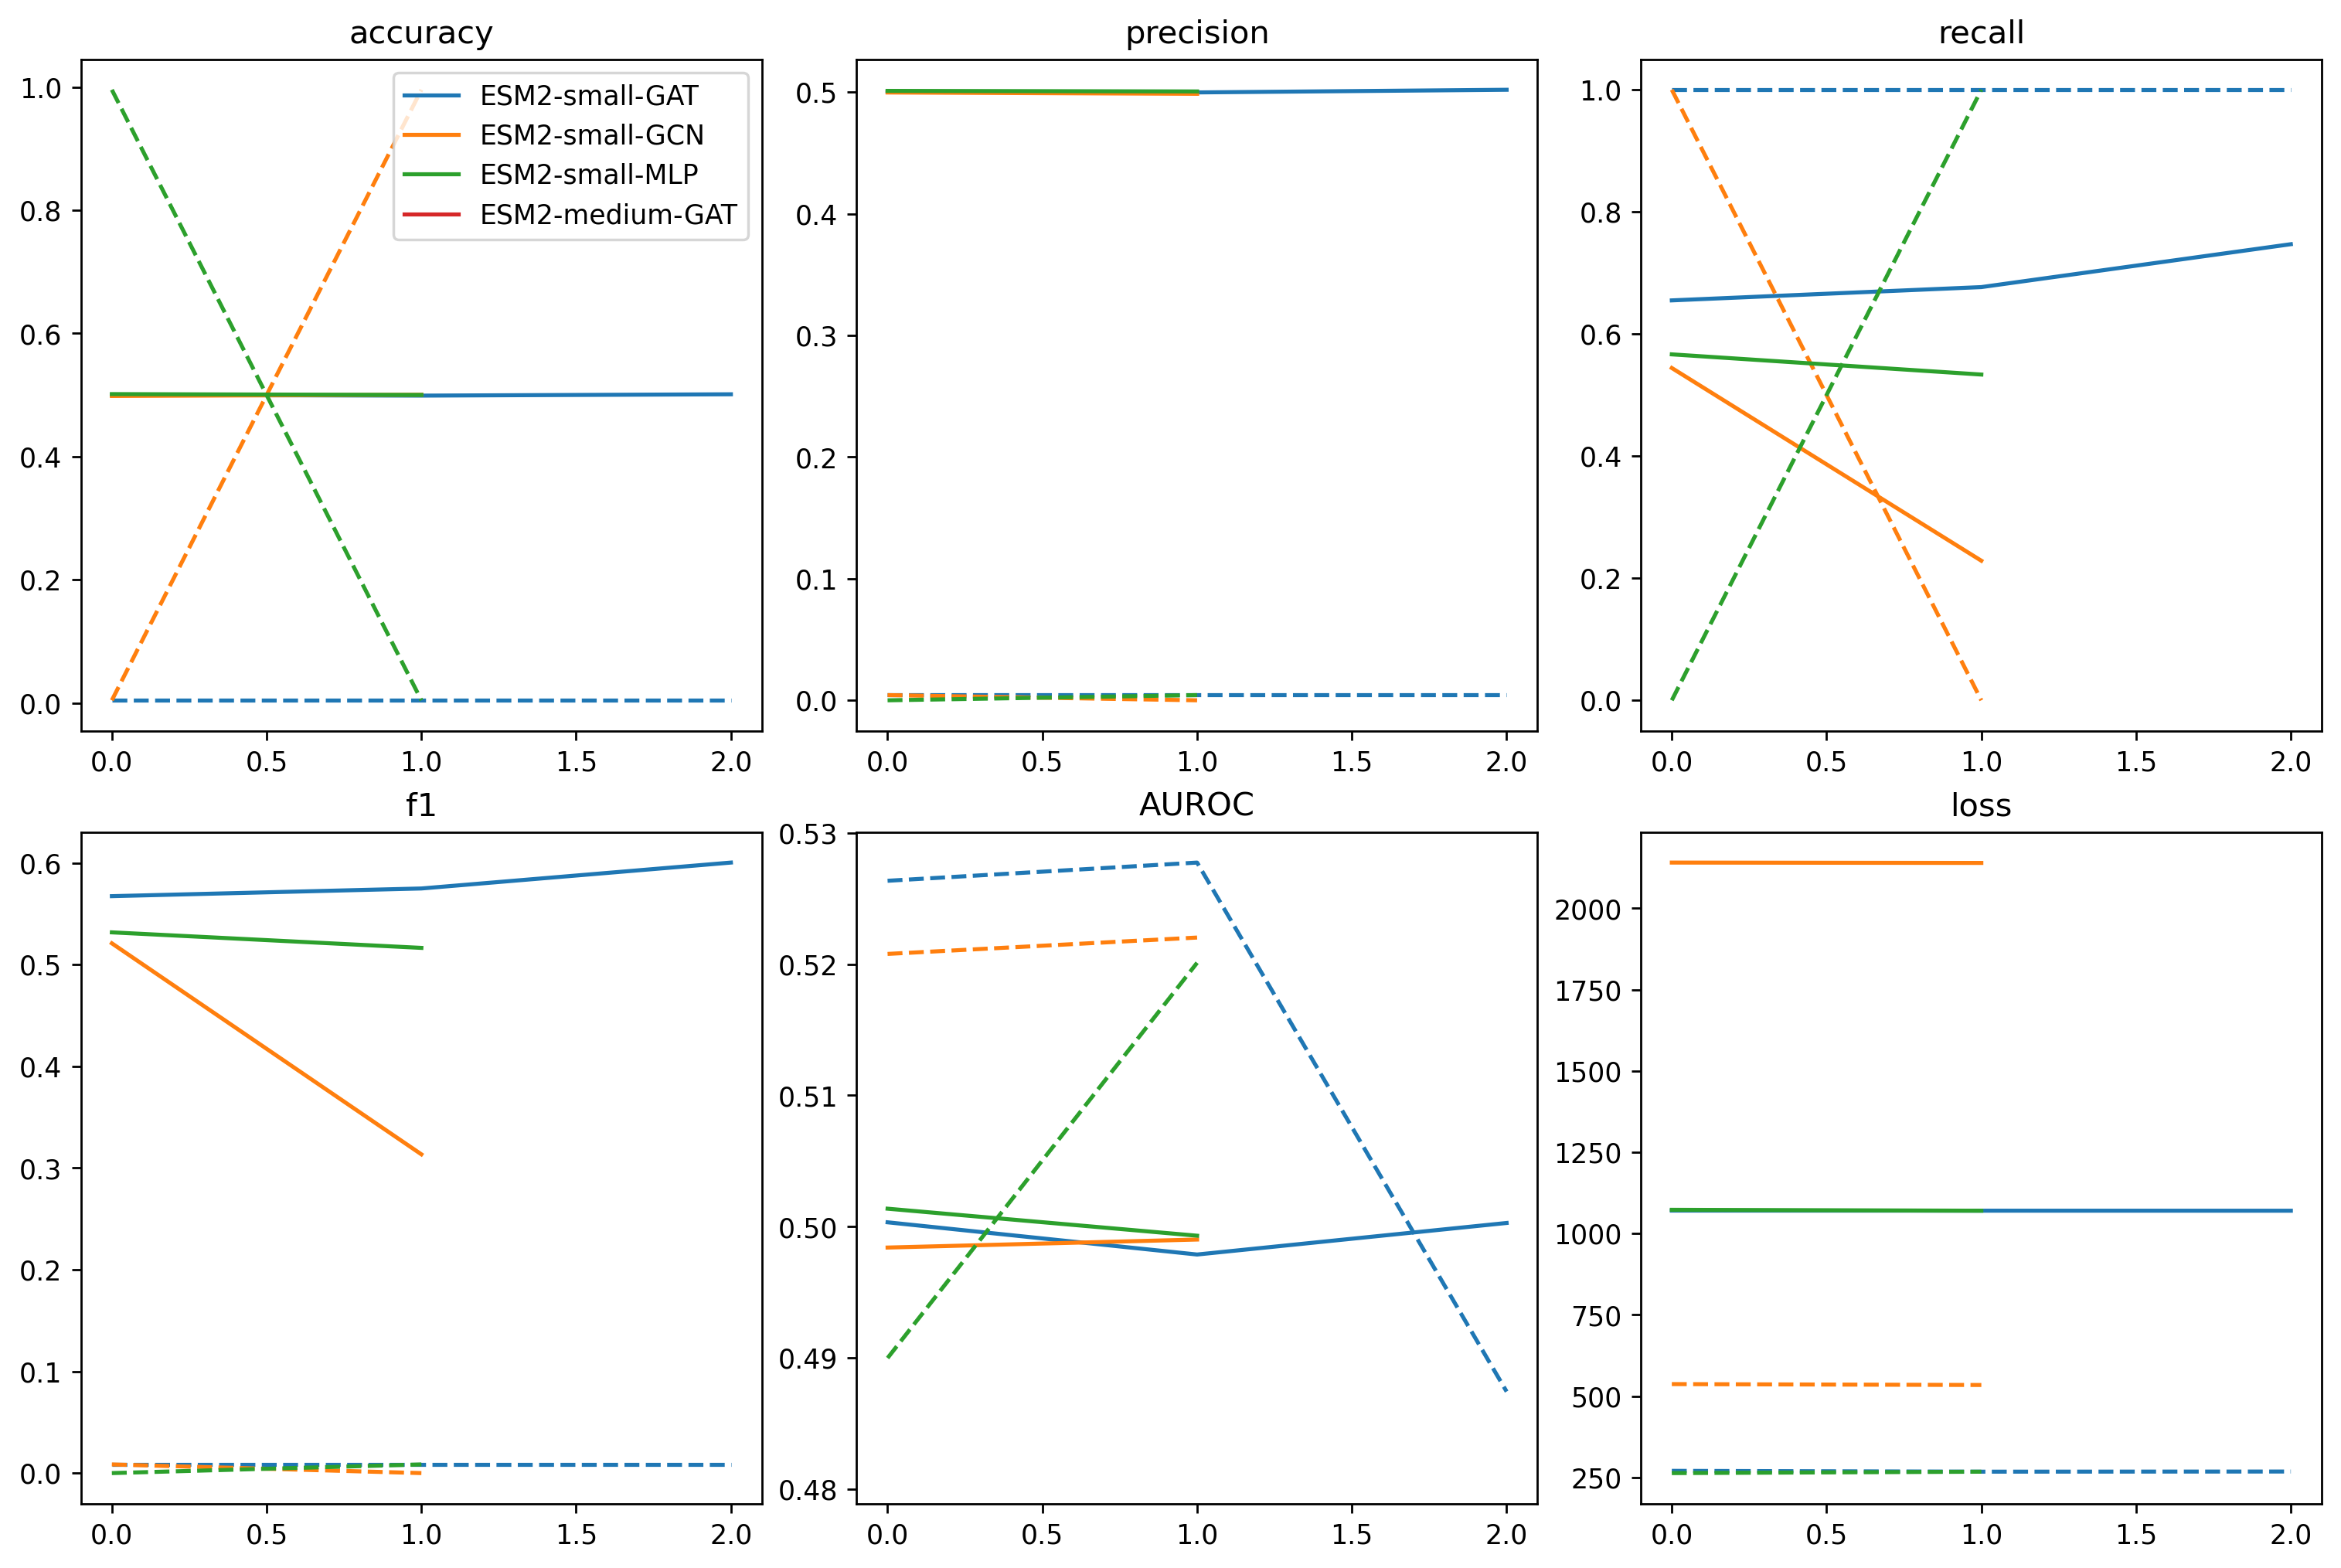

In [33]:
fig, axes = plt.subplots(2,3, figsize=(12,8), constrained_layout=True)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
for exp, name, c in zip(experiments, experiment_names, colors):
    train, test = pd.read_parquet(exp + '_train.parquet').dropna(axis=1, how='all'), pd.read_parquet(exp + '_test.parquet').dropna(axis=1, how='all')
    for metric, ax in zip(['accuracy', 'precision', 'recall', 'f1', 'AUROC', 'loss'], axes.flatten()):
        ax.plot(train.loc[metric, :].values, c = c, label = name)
        ax.plot(test.loc[metric, :].values, ls='dashed', c = c)
        ax.set_title(metric)
axes[0,0].legend()

fig.savefig('../figures/esm-metrics.svg')